Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

find the average price 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

This data frame has 18429 rows and 14 columns 

In [5]:
df.columns

Index(['Unnamed', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Columns Analysis

In [6]:
df.dtypes

Unnamed           int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [9]:
df.drop('Unnamed',axis=1,inplace=True)


Removed the first column as that column ikd judt a serikal no contributing no value to test 

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no nan values 

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

converting the date month year from dob in to day and month to help analysis 

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Month and day are added at the last

In [14]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

# Target variable and Features 


Here the target variable is Region 
and other columns are independant variables 

Convert all the columns to one datatype

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [17]:
df1.dtypes

Date            int64
AveragePrice    int64
Total Volume    int64
4046            int64
4225            int64
4770            int64
Total Bags      int64
Small Bags      int64
Large Bags      int64
XLarge Bags     int64
type            int32
year            int64
region          int32
Month           int64
Day             int64
dtype: object

Now all the columns are in same dtype

Analysing the Target variable first 

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

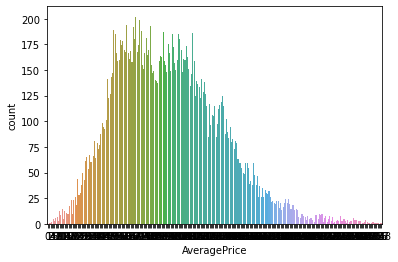

In [19]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.countplot(df1['AveragePrice'])

The Attrition has more than two values hence this is a Regression problem 

# Univariate Analysis

<AxesSubplot:xlabel='Date', ylabel='Density'>

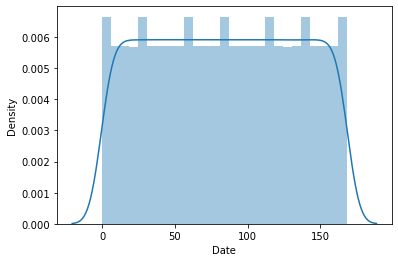

In [20]:
sns.distplot(df1['Date'])

This is not normally distributed 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

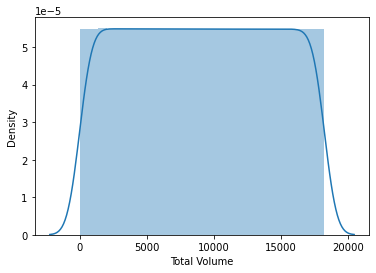

In [22]:
sns.distplot(df1['Total Volume'])

This is not normally distributed 

<AxesSubplot:xlabel='4046', ylabel='Density'>

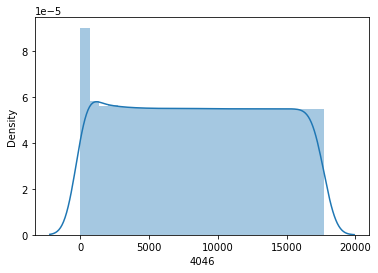

In [23]:
sns.distplot(df1['4046'])

This is not normally distributed

<AxesSubplot:xlabel='4225', ylabel='Density'>

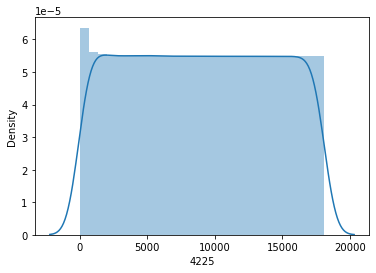

In [24]:
sns.distplot(df1['4225'])

This is not normally distributed

<AxesSubplot:xlabel='4770', ylabel='Density'>

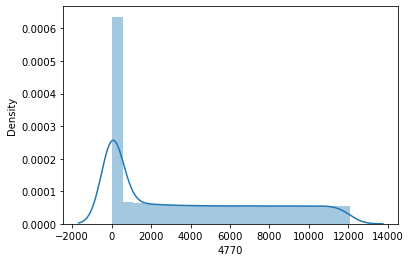

In [26]:
sns.distplot(df1['4770'])

This is not normally distributed

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

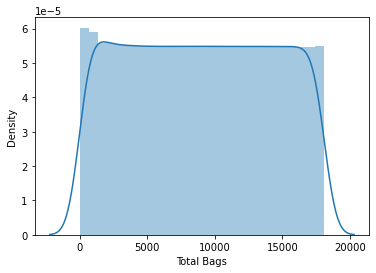

In [27]:
sns.distplot(df1['Total Bags'])

This is not normally distributed

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

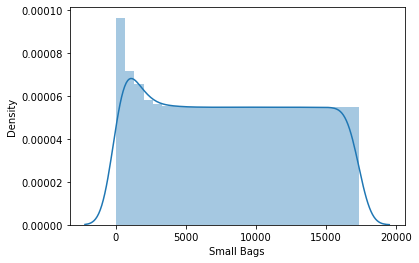

In [28]:
sns.distplot(df1['Small Bags'])

This is not normally distributed

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

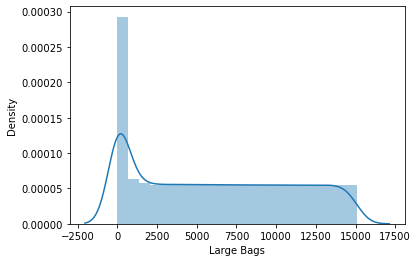

In [29]:
sns.distplot(df1['Large Bags'])

This is not normally distributed

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

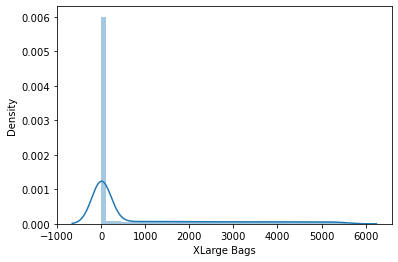

In [30]:
sns.distplot(df1['XLarge Bags'])

This is not normally distributed

<AxesSubplot:xlabel='type', ylabel='Density'>

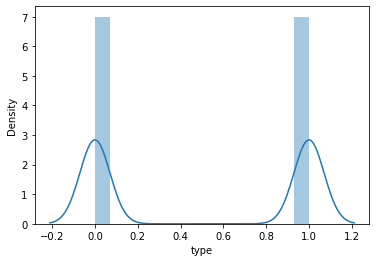

In [31]:
sns.distplot(df1['type'])

This is not normally distributed

<AxesSubplot:xlabel='year', ylabel='Density'>

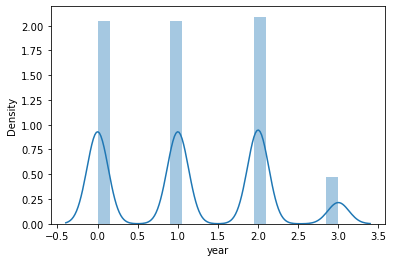

In [32]:
sns.distplot(df1['year'])

This is not normally distributed

<AxesSubplot:xlabel='region', ylabel='Density'>

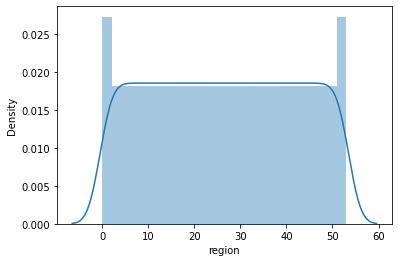

In [34]:
sns.distplot(df1['region'])

This is not normally distributed

<AxesSubplot:xlabel='Month', ylabel='Density'>

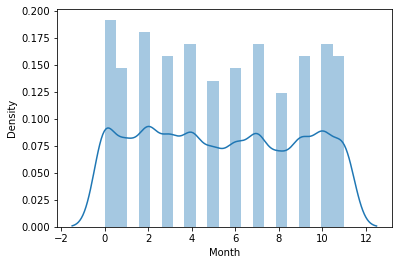

In [35]:
sns.distplot(df1['Month'])

This is not normally distributed


<AxesSubplot:xlabel='Day', ylabel='Density'>

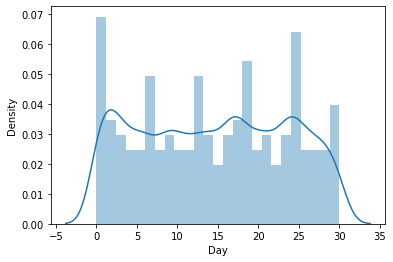

In [37]:
sns.distplot(df1['Day'])

This is not normally distributed

All columns have Skewness 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

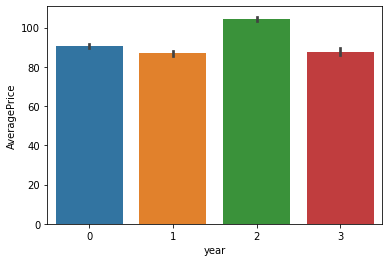

In [41]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=df1 )

2017 has average price

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

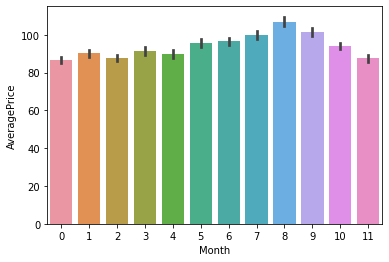

In [40]:

#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df1 )

sept and october is the month where max no og average price is there

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

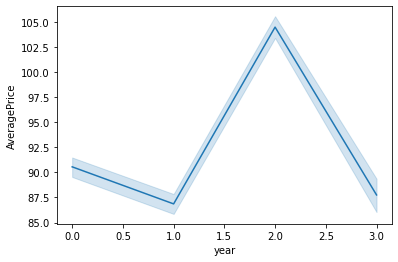

In [42]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df1)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

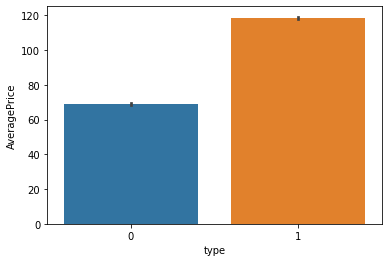

In [43]:
sns.barplot(x = "type" , y = "AveragePrice" ,data=df1 )

o is conventonal type
1 is organic type

we understand that organic type is having the more price per unit then conventional 

# Bi Variate analysis

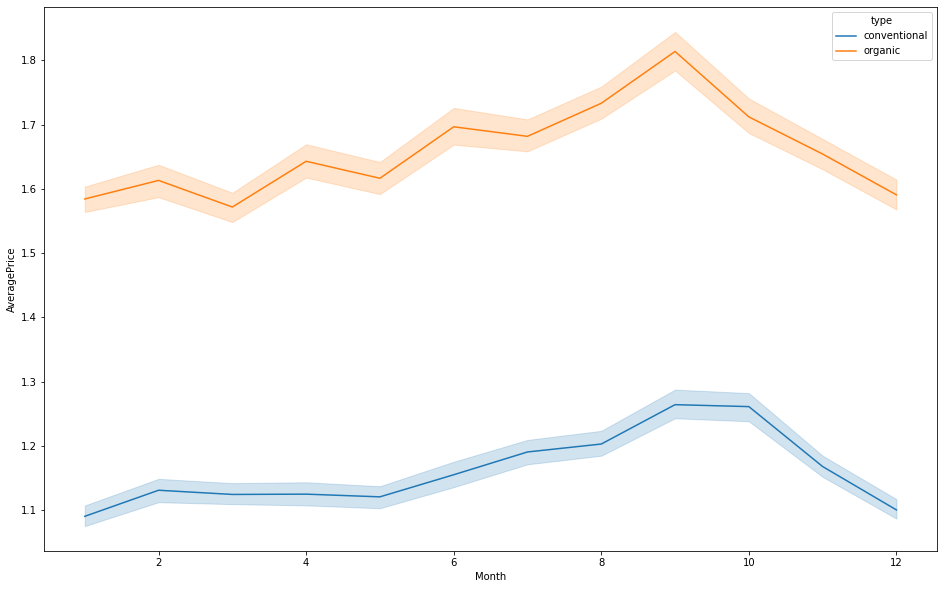

In [44]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df1)
plt.show()

Above graph shown that there is hike between month 8-10 of both type of avacado

Text(0.5, 1.0, 'ration of Price and Region')

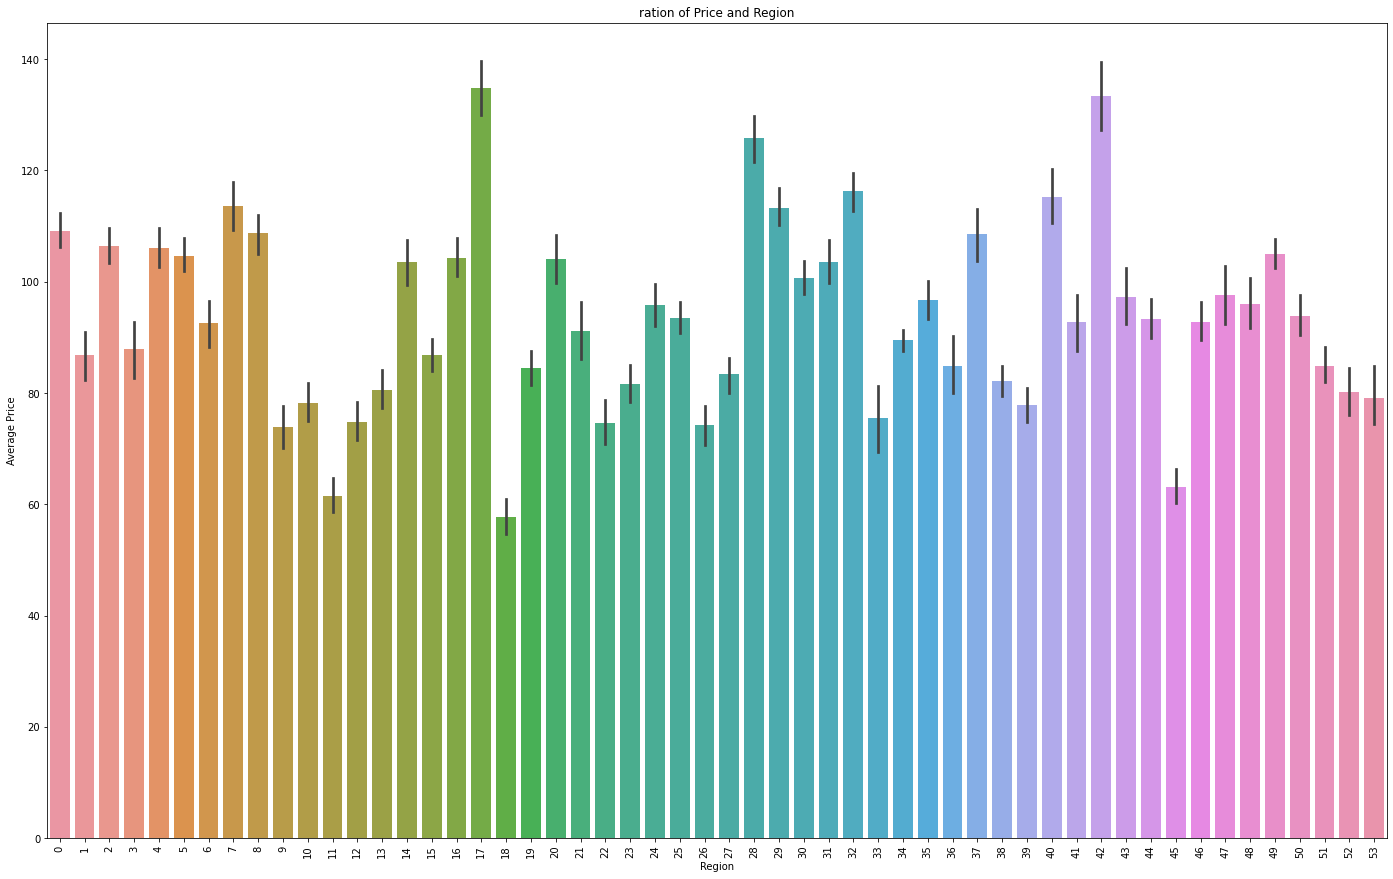

In [45]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df1)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')


All are values not able to analyse

Text(0.5, 1.0, 'Average_Price')

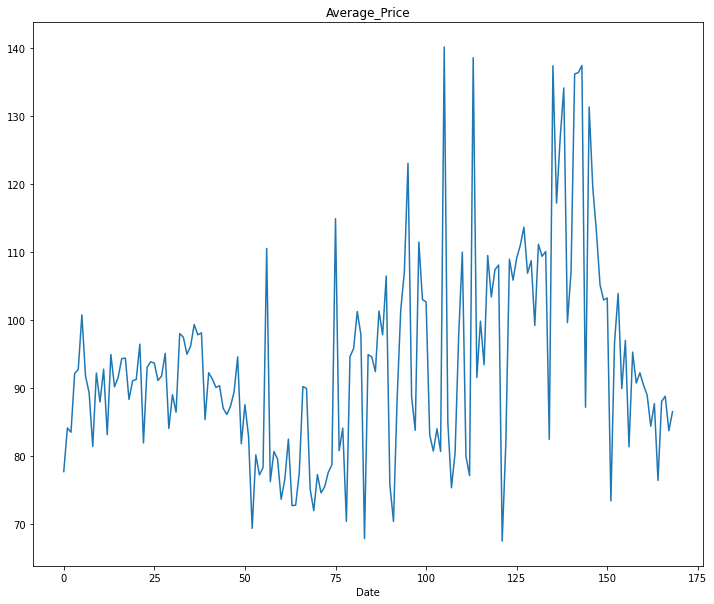

In [47]:
date=df1.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')


above is showing on date 28,29 and 30 the price of avacado is high

Text(0.5, 1.0, 'Average_Price')

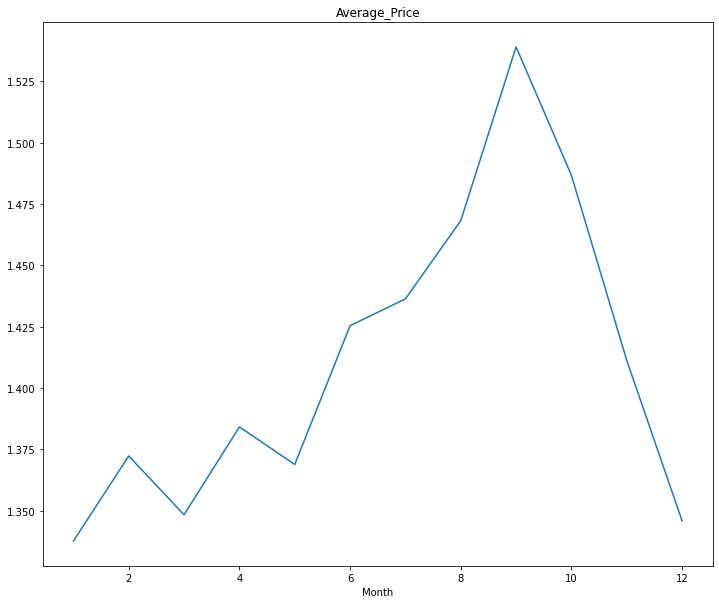

In [48]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

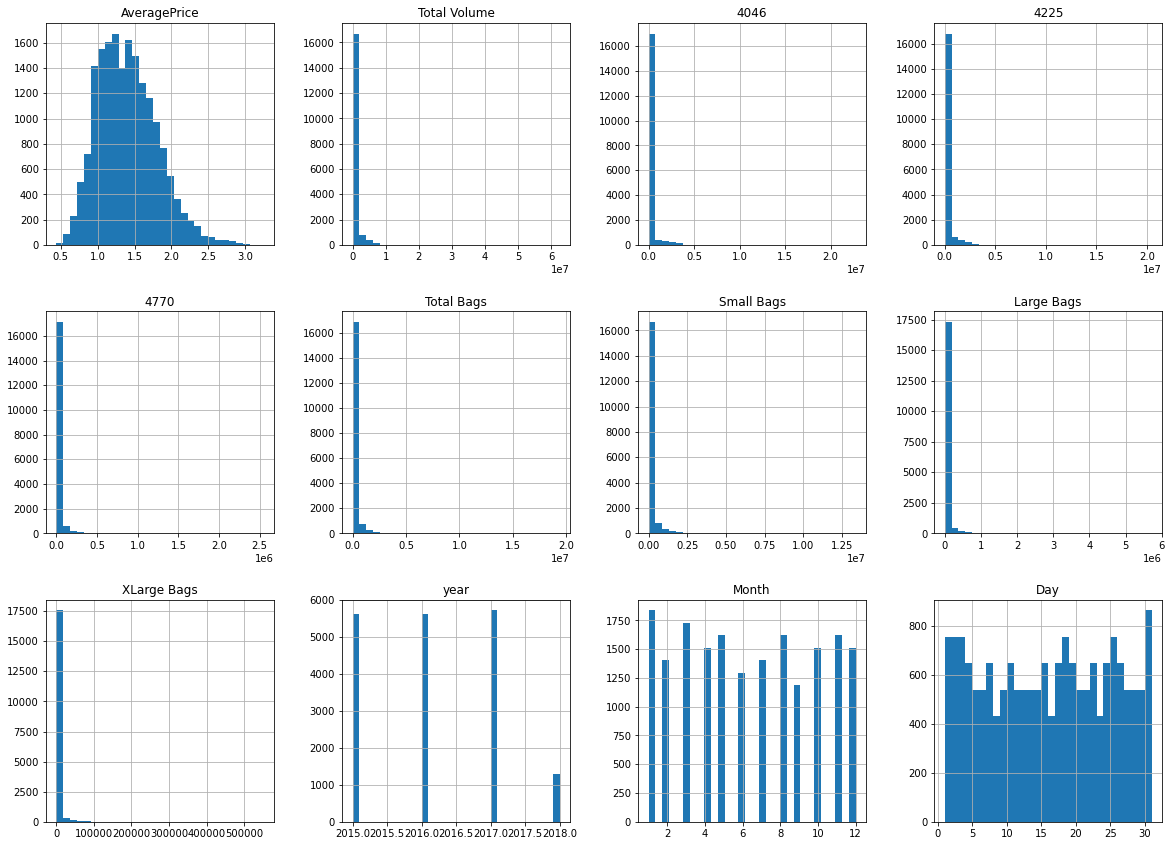

In [49]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [50]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

# identifying the Outliers 

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: object

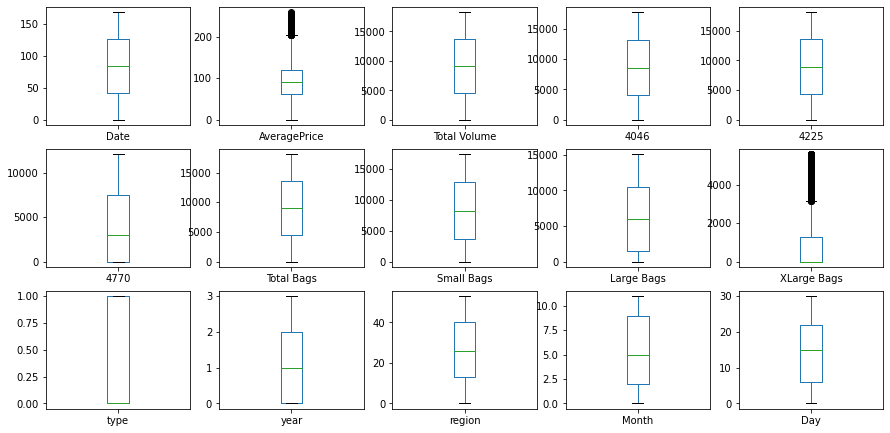

In [52]:
#plotting the boxplot of each column to check the outliers 
df1.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

Average price,XLarge bags have outliers

In [54]:
cor=df1.corr()
cor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Date,1.000000,0.121186,0.076998,0.004050,-0.001591,-0.062172,0.199109,0.174370,0.174161,0.158378,-0.000030,0.950267,-0.000052,0.205117,-0.001188
AveragePrice,0.121186,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.339222,0.615982,0.093216,-0.011796,0.075140,0.061134
Total Volume,0.076998,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.600745,-0.808491,0.085824,0.095988,-0.021548,-0.015766
4046,0.004050,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.562309,-0.748193,0.011444,0.184896,-0.019358,-0.014405
4225,-0.001591,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.577395,-0.780779,0.006278,0.068547,-0.024023,-0.012530
4770,-0.062172,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.624137,-0.748100,-0.055180,0.050078,-0.022740,-0.008699
Total Bags,0.199109,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.594852,-0.754928,0.205703,0.098432,-0.011257,-0.011613
Small Bags,0.174370,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.590193,-0.757381,0.180780,0.094037,-0.009457,-0.007924
Large Bags,0.174161,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.474620,-0.527684,0.180002,0.121728,-0.011675,-0.011831
XLarge Bags,0.158378,-0.339222,0.600745,0.562309,0.577395,0.624137,0.594852,0.590193,0.474620,1.000000,-0.561368,0.160041,0.012659,0.000908,0.001994


<AxesSubplot:>

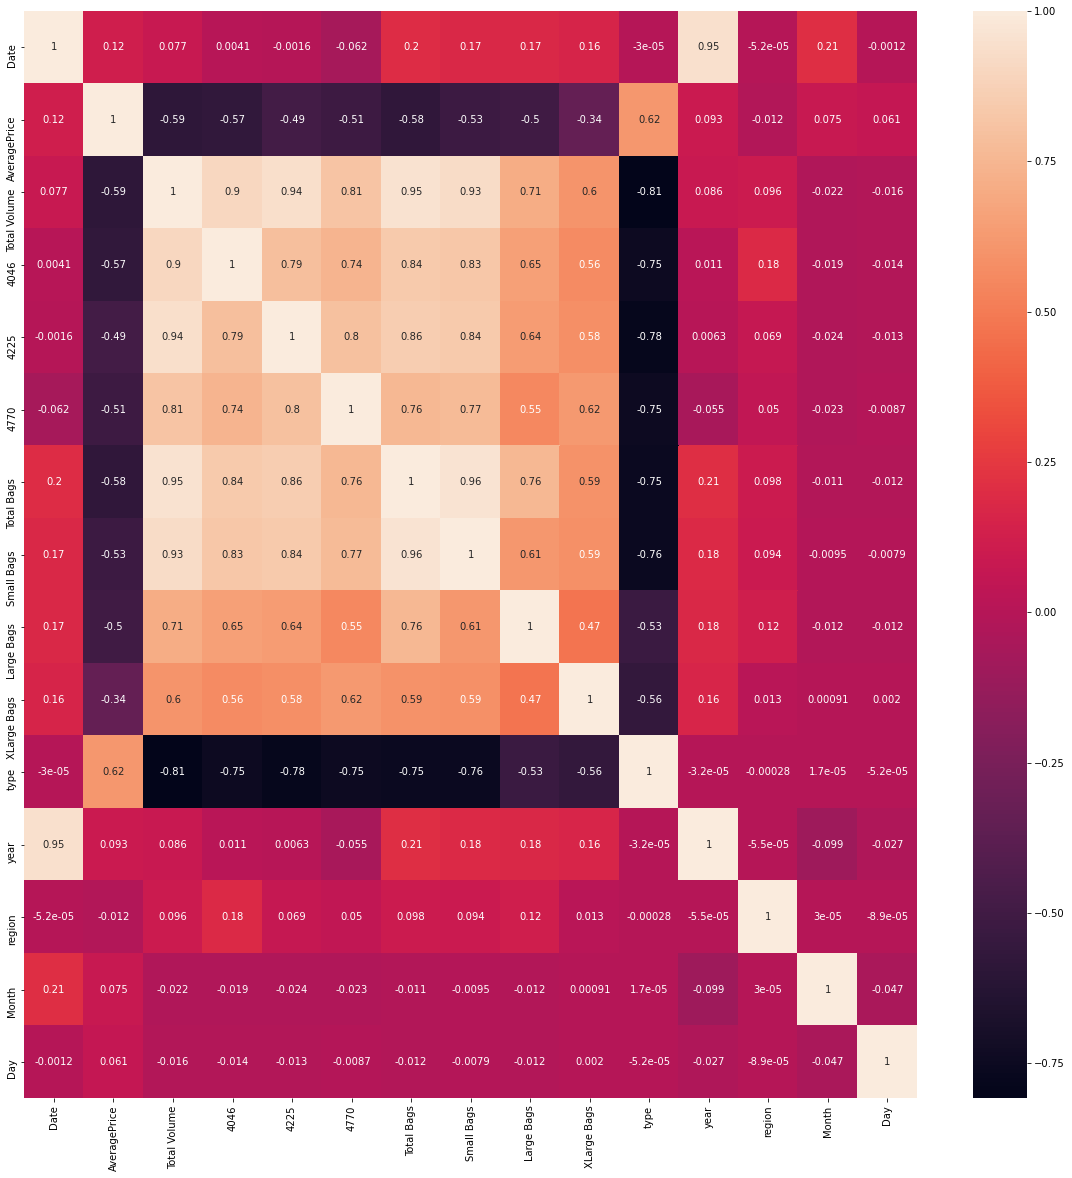

In [56]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

# Removing Outliers

In [57]:
from scipy.stats import zscore

z=np.abs(zscore(df1))

df2=df1[(z<3).all(axis=1)]

In [58]:
df2.shape

(18118, 15)

In [59]:
df1.shape

(18249, 15)

Outlier removal calculation 18249-18118/18249 = 0.07 %

This is less than 8% and hence we can consider the new df


# Removing skewness¶

In [60]:
df2.skew()

Date            0.008160
AveragePrice    0.400323
Total Volume   -0.009983
4046            0.006429
4225           -0.006789
4770            0.500235
Total Bags     -0.003095
Small Bags      0.037888
Large Bags      0.181088
XLarge Bags     1.599287
type            0.014794
year            0.224198
region          0.006878
Month           0.051834
Day            -0.001946
dtype: float64

# Variance Inflation Factor to find multi collinearity

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

In [63]:
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                            for i in range(len(df2.columns))]
print(vif_data)

         feature         VIF
0           Date  770.971145
1   AveragePrice   11.964018
2   Total Volume  249.960726
3           4046   31.481534
4           4225   60.928018
5           4770    7.604133
6     Total Bags  213.548748
7     Small Bags   99.938599
8     Large Bags   12.154338
9    XLarge Bags    2.466866
10          type    5.914975
11          year  465.567847
12        region    4.238173
13         Month   62.144201
14           Day    4.376430


# Defining X and Y

In [64]:
x = df2.drop(columns=['AveragePrice','Date'])
y = df2[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18118, 13)
(18118, 1)


# Standard scalar

In [65]:
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1)

In [67]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.63692696 0.60380769 0.73261146 ... 0.32075472 0.72727273 0.56666667]
 [0.27204431 0.21495961 0.28236009 ... 0.83018868 0.90909091 0.26666667]
 [0.84684141 0.90497712 0.64466052 ... 0.45283019 0.18181818 0.56666667]
 ...
 [0.96644001 0.98045308 0.93619137 ... 0.8490566  0.09090909 0.66666667]
 [0.25592235 0.00779617 0.16070935 ... 0.0754717  0.09090909 0.9       ]
 [0.78454705 0.39206824 0.87050439 ... 0.0754717  0.45454545 0.66666667]]


# Models for Regression problem

Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(new_xtrain,y_train)

LinearRegression()

In [69]:
lr.score(new_xtrain,y_train)

0.5372149646771647

In [70]:
pred_test=lr.predict(new_xtest)

In [71]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test))

0.5434714570555038


In [72]:
from sklearn.model_selection import cross_val_score
cvscoreslr= cross_val_score(lr,new_xtrain,y_train, scoring = 'r2', cv =2)

In [73]:
cvscoreslr

array([0.53814402, 0.53302907])

Lasso Regression model


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [75]:

from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(new_xtrain,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [81]:
ls = Lasso(alpha=0.0001)
ls.fit(new_xtrain,y_train)
ls.score(new_xtrain,y_train)

0.5372149485918186

In [77]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.20924403971923136

In [78]:

pred_testls=ls.predict(new_xtest)

In [79]:
print(r2_score(y_test,pred_testls))

0.5309837287683091


Random Forest Regressor Model

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(new_xtrain,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [82]:
rf= RandomForestRegressor(criterion="mse", max_features ="auto")
rf.fit(new_xtrain, y_train)
rf.score(new_xtrain, y_train)
pred_decision = rf.predict(new_xtest)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 84.92278270984318
Cross Val Score: 26.27000837813681


In [83]:
rf.score(new_xtrain,y_train)

0.9788845088903907

In [84]:
train, validation = train_test_split(df, test_size=0.50, random_state = 0)

Difference between R2 score and CV score

54.3-53.3= 1

53-20 = 33 

84.2-=26.27= 56


# Final Model

Linear Regression is the best model as the difference is less

In [85]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=10, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)


In [89]:
import pickle
filename = 'avacado_project.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [90]:
loaded_model = pickle.load(open('avacado_project.pkl', 'rb'))
result = loaded_model.score(new_xtest, y_test)
print(result)

0.8492278270984317


In [91]:
conclusion=pd.DataFrame([loaded_model.predict(new_xtest)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [92]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5426,5427,5428,5429,5430,5431,5432,5433,5434,5435
Predicted,27.27,108.36,145.13,72.49,113.28,85.19,60.13,62.59,158.86,116.37,...,66.39,147.68,140.48,83.98,46.01,72.77,56.46,105.49,68.6,95.87
Orginal,27.27,108.36,145.13,72.49,113.28,85.19,60.13,62.59,158.86,116.37,...,66.39,147.68,140.48,83.98,46.01,72.77,56.46,105.49,68.6,95.87


Prediction = Original

>1 mean=0.8500 se=0.043
>2 mean=0.8350 se=0.035
>3 mean=0.8167 se=0.025
>4 mean=0.8175 se=0.021
>5 mean=0.8100 se=0.017
>6 mean=0.8100 se=0.015
>7 mean=0.8086 se=0.014
>8 mean=0.8100 se=0.013
>9 mean=0.8100 se=0.013
>10 mean=0.8100 se=0.012
>11 mean=0.8064 se=0.012
>12 mean=0.8058 se=0.011
>13 mean=0.8077 se=0.011
>14 mean=0.8050 se=0.011
>15 mean=0.8053 se=0.011


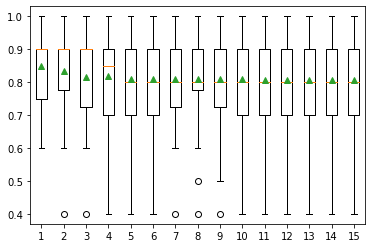

In [93]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [94]:

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


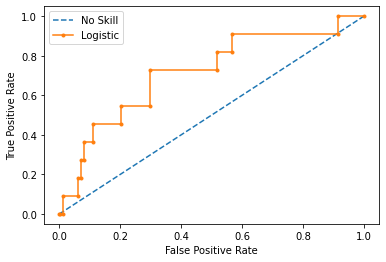

In [95]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
new_xtrain, new_xtest, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(new_xtrain, y_train)
# predict probabilities
lr_probs = model.predict_proba(new_xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()